### 1. Download the dataset

In [1]:
#importing modules 
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating a function to fetch the data and extract csv file from it
os.chdir('./')

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename="housing.tgz")
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
# Creating a function to load the file
def load_files(housing_path = HOUSING_PATH, name = "housing.csv"):
    csvpath = os.path.join(housing_path,name)
    return pd.read_csv(csvpath)

housing = load_files()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2. Some data exploration

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


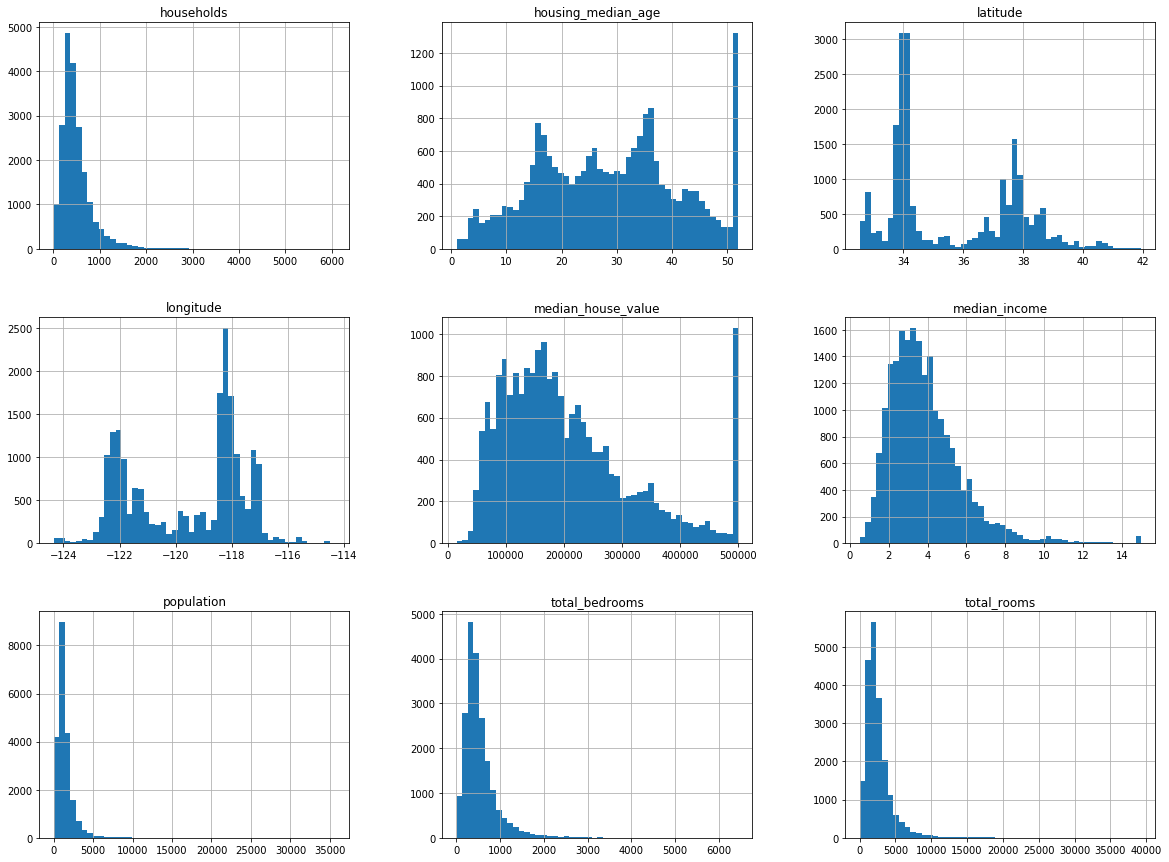

In [7]:
housing.hist(bins=50,figsize = (20,15))
plt.show()

### 3. Create a test set

In [8]:
import numpy as np

In [9]:
# Method 1 - Create a function yourself
np.random.seed(4)
def train_test(data,test_ratio):
    i = np.random.permutation(len(data))
    testsize = int(len(data)*test_ratio)
    test = i[:testsize]
    train = i[testsize:]
    return data.iloc[test], data.iloc[train]

test, train = train_test(housing, 0.2)
print("{},{}".format(len(test), len(train)))

4128,16512


In [10]:
# Method 2 - scikitlearn - better and easier
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size = 0.2, random_state = 4)
print(len(train), len(test))

16512 4128


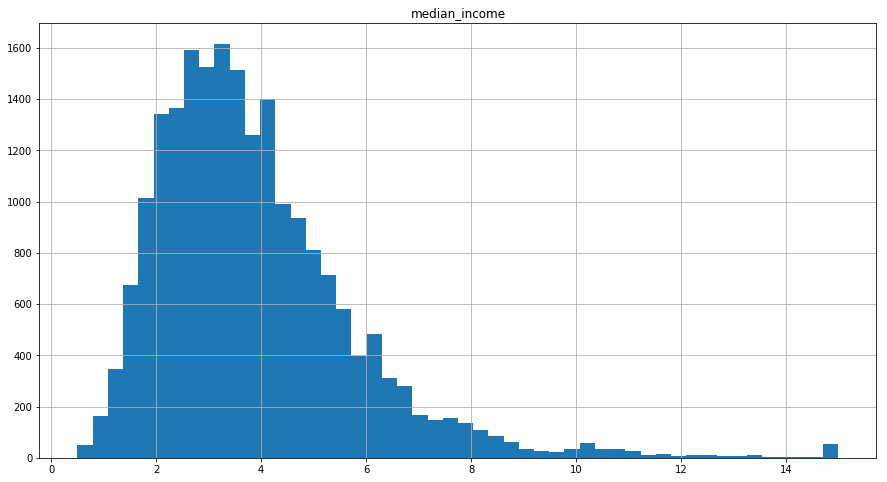

In [11]:
housing.hist(bins = 50 , column= 'median_income', figsize = (15,8))   #large left skewness
plt.show()

In [12]:
# Now creating the income categories for stratified sampling
housing['income_cat'] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.0, np.inf],
                               labels=[1,2,3,4,5],
                               )
# If you wish to delete the column at any point
# housing = housing.drop(['income_cat'], axis = 1)

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

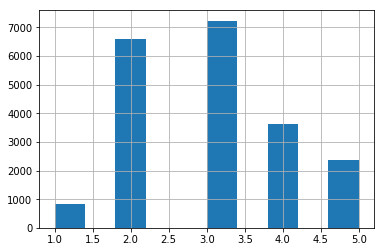

In [13]:
housing["income_cat"].hist()

In [14]:
# Now using stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=4)

In [15]:
for train_index , test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [16]:
strat_test["income_cat"].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

NOTE: If we compare this with the test split from train_test_split(which is a result of random sampling), we find that the sampling bias is much less in stratified sampling

In [17]:
# Removing the income_cat column from housing now
housing = housing.drop(['income_cat'], axis = 1)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### 4. Visualizing the data and gaining insights

In [18]:
# Making a copy of the stratifierd sample training set
housing = strat_train.copy()

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15738,-122.42,37.78,17.0,1257.0,339.0,1093.0,384.0,1.8438,72500.0,NEAR BAY,2
3530,-118.54,34.26,22.0,5303.0,838.0,2372.0,807.0,5.6912,311800.0,<1H OCEAN,4
5949,-117.86,34.14,36.0,3097.0,667.0,1484.0,634.0,3.1905,235300.0,INLAND,3
8420,-118.34,33.93,37.0,1638.0,407.0,1341.0,369.0,3.0677,167700.0,<1H OCEAN,3
2672,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463,61200.0,INLAND,2


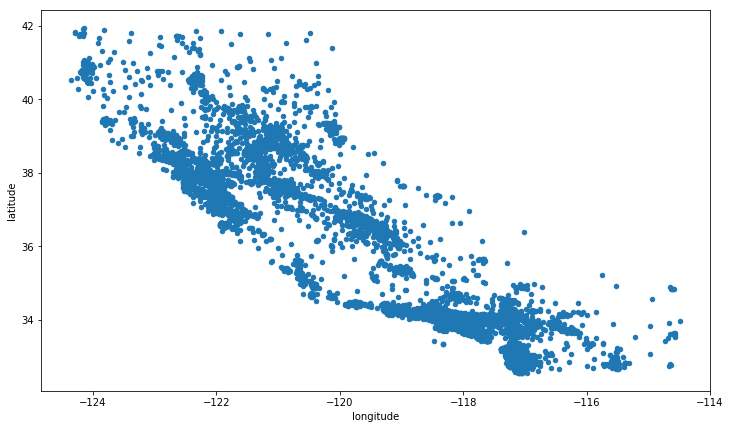

In [20]:
# Now visualizing the geographical data 
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (12,7))
plt.show()

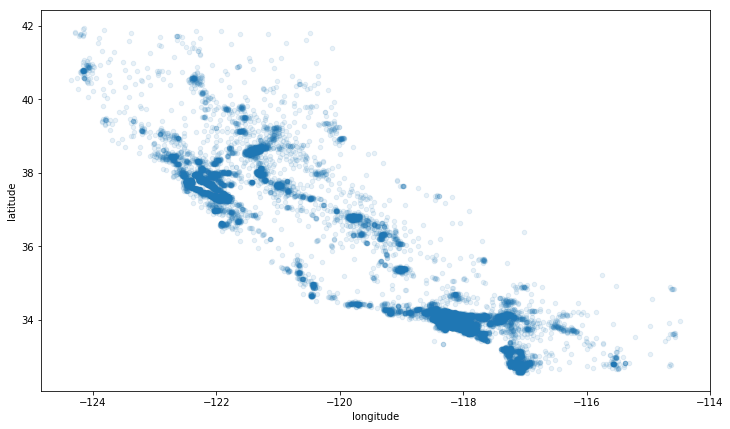

In [29]:
# Now add a new option alpha to see the places where the density of points is higher
housing.plot(kind='scatter', x = 'longitude', y='latitude', figsize = (12,7), alpha = 0.1)
plt.show()

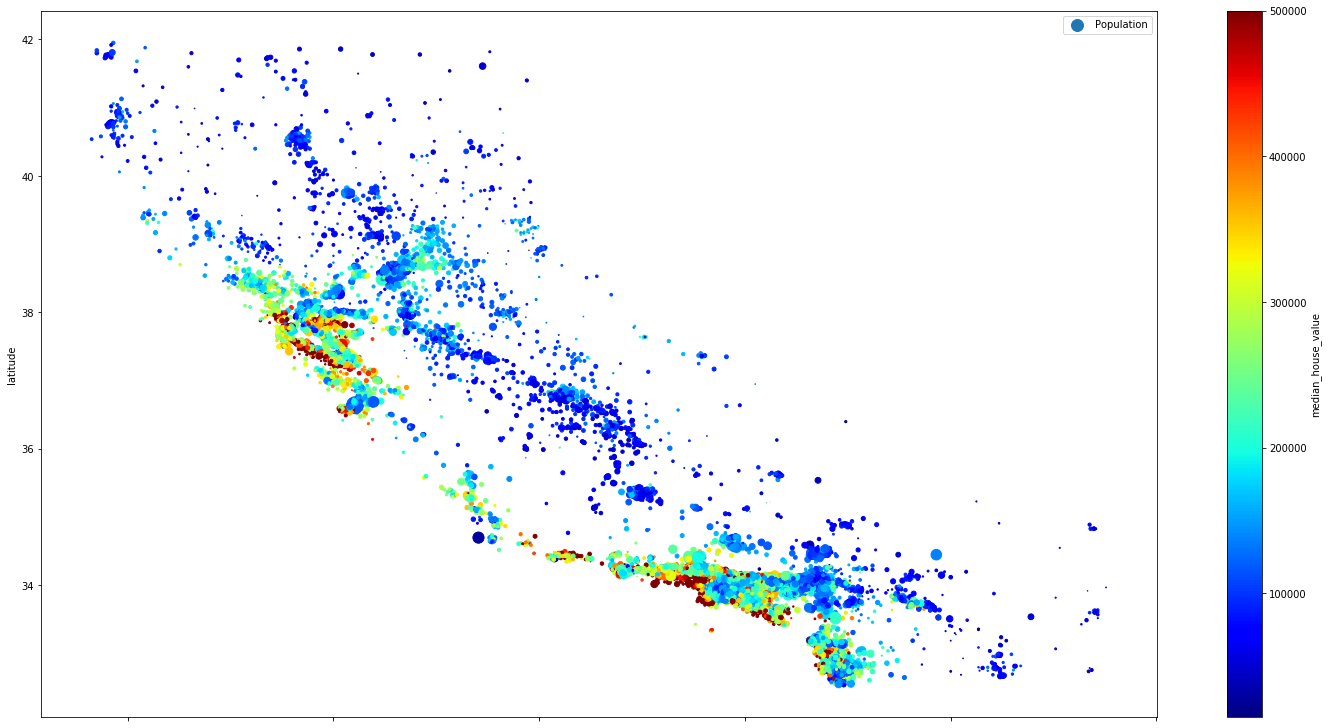

In [22]:
# Now let us make a plot with the population and median_value of the houses as indicators using a cmap
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (25,13),
            s = housing['population']/100, label = 'Population', 
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()
plt.show()

NOTE: The figure does highlight some patterns of prices being higher for coastal regions with high population density

### 5. Checking for correlations

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687742
total_rooms           0.135814
housing_median_age    0.106751
households            0.070866
total_bedrooms        0.054766
population           -0.021040
longitude            -0.049612
latitude             -0.139180
Name: median_house_value, dtype: float64

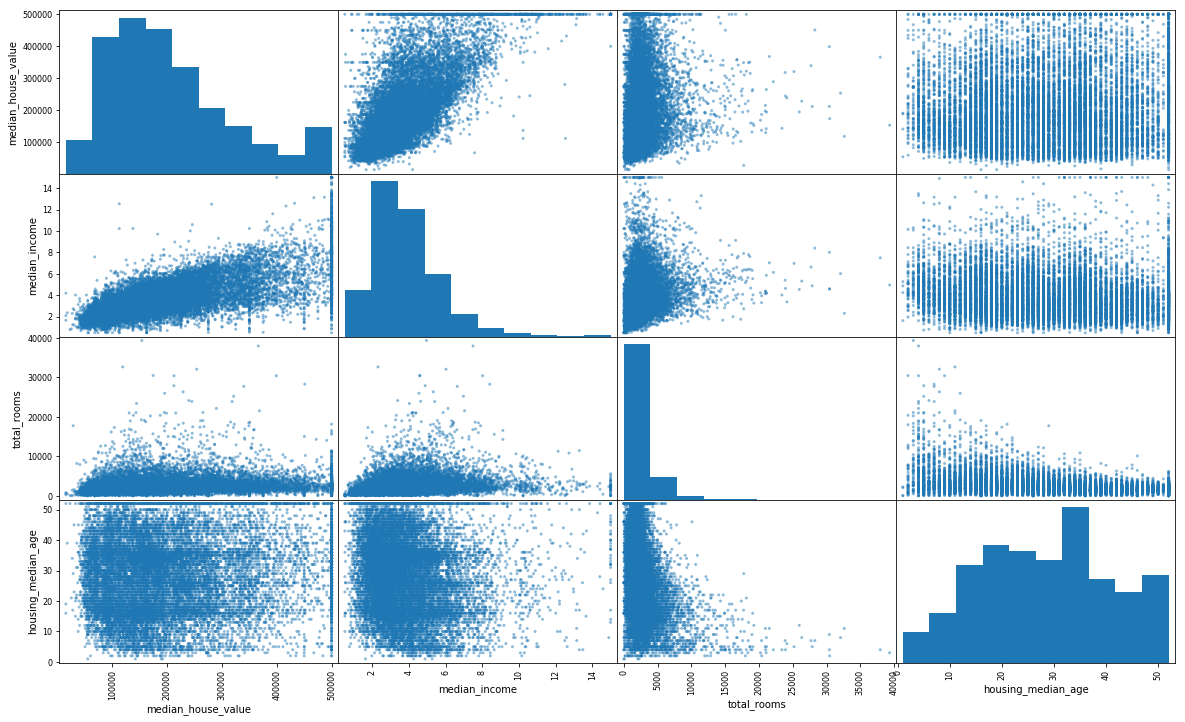

In [24]:
# Creating a scatter_matrix to visualize the correlation between the promising values
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms','housing_median_age']], figsize=(20,12)  )
plt.show()

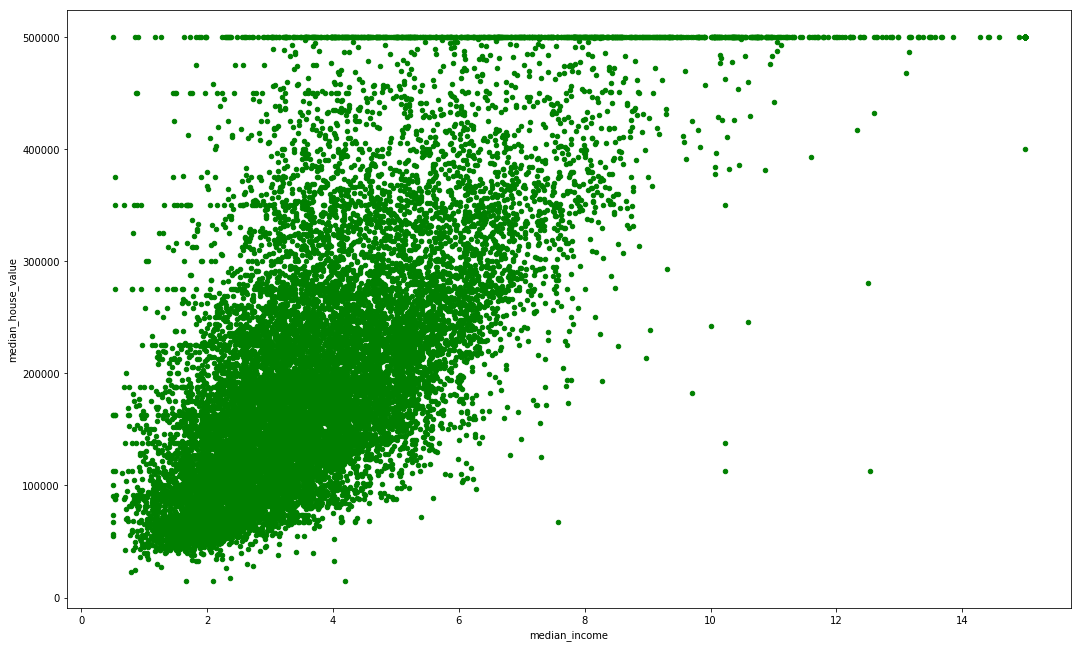

In [25]:
# Checking the strong correlations using scatter plots
housing.plot(kind = "scatter", x = 'median_income', y = 'median_house_value', color='green', figsize=(18,11))
plt.show()

NOTE: There are many straight lines of points in the above graph which should be removed to decrease the bias

### 6. Deriving new attributes from existing ones

In [26]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [27]:
# Deriving some common attributes and checking for correlation
housing['rooms_per_house'] = housing['total_bedrooms']/housing['households']
housing['population_per_house'] = housing['population']/housing['households']
housing['income_per_person'] = housing['median_income']/housing['population']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['bedrooms_per_house'] = housing['total_bedrooms']/housing['households']

In [28]:
corr_mat = housing.corr()
corr_mat["median_house_value"].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.687742
total_rooms             0.135814
income_per_person       0.115744
housing_median_age      0.106751
households              0.070866
total_bedrooms          0.054766
population_per_house   -0.020308
population             -0.021040
bedrooms_per_house     -0.045578
rooms_per_house        -0.045578
longitude              -0.049612
latitude               -0.139180
bedrooms_per_room      -0.254139
Name: median_house_value, dtype: float64

RESULT: We can clearly see that bedrooms_per_room is more linearly correlated than total_bedrooms

### 7. Preparing the data for the algorithms

In [38]:
# Seperate the predictors and the labels from the training set
def seperate_labels(train, labelname):
    housing = train.drop([labelname],axis =1)
    housing_label = train[labelname].copy()
    return housing, housing_label

#housing = strat_train.drop(['median_house_value'], axis = 1)
#housing_label = strat_train['median_house_value'].copy()
seperate_labels(strat_train,'median_house_value')                           

#### Cleaning the numercial data

In [39]:
# Filling the NA values - A few methods
housing.dropna(subset='total_bedrooms')  # method 1
housing.drop(['total_bedrooms'], axis=1) # method 2
median = housing['total_bedrooms'].median()
print(median)
housing['total_bedrooms'].fillna(median, inplace = True)   #method 3

433.0

In [60]:
# Using sci-kit learn's imputer
from sklearn.preprocessing import Imputer

#removing the categorical column from the data for numerical imputation
housing_num = housing.drop(['ocean_proximity'], axis = 1)

strategy = 'median'

def median_imputer(data, strategy):
    global housing_tr 
    Impute = Imputer(strategy = strategy)
    Impute.fit(data)
    print(Impute.statistics_)
    outputArray = Impute.transform(data)
    housing_tr = pd.DataFrame( outputArray, columns=housing_num.columns)

median_imputer(housing_num, strategy)
    

[-118.49      34.25      29.      2119.5      433.      1166.5
  409.         3.53825    3.     ]


In [62]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


#### Label and One-hot encoding of categorical data

In [65]:
# Using the label encoding and one-hot encoding one by one - method 1
housing_lab = housing['ocean_proximity']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_lab_encoded = encoder.fit_transform(housing_lab)
housing_lab_encoded

array([3, 0, 1, ..., 1, 4, 1], dtype=int64)

NOTE: You can clearly see that the labels are 0 to 4 but does it mean that label 0 and 1 are more related than 0 and 4. To avoid the model from assuming this, we use one-hot encoding

In [66]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_lab_onehot = encoder.fit_transform(housing_lab_encoded.reshape(-1,1))
housing_lab_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [67]:
# Using the LabelBinarizer to perform both the above steps together

from sklearn.preprocessing import LabelBinarizer 
encoder = LabelBinarizer()
housing_onehot = encoder.fit_transform(housing_lab)
housing_onehot

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

NOTE: The LabelBinarizer method gives an numpy array of attributes whereas the OneHotEncoder returns a sparse matrix which can be converted to an array using the method toarray()